graph-toolチートシート（グラフ構築、統計量編）「 url:https://qiita.com/yohm/items/65b5a26af8956106ed27 」

In [19]:
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

空の有向グラフを作成する

In [20]:
g = gt.Graph()

空の無向グラフを作成する

In [21]:
ug = gt.Graph(directed=False)

ノードを追加する

In [22]:
v = g.add_vertex()         # => <Vertex object with index '0' at 0x7fbfd8c718d0>
vlist = g.add_vertex(3)   # 複数のノードの追加
# => [<Vertex object with index '1' at 0x7fbfd8c71690>,  <Vertex object with index '2' at 0x7fbfd8c71b10>,   <Vertex object with index '3' at 0x7fbfd8c71bd0>]

# get the number of vertices
g.num_vertices()   # => 4

# get vertex object by index
v2 = g.vertex(2)   # => <Vertex object with index '2' at 0x7fbfd8c71b10>

エッジを追加する

In [23]:
e = g.add_edge(g.vertex(0), g.vertex(2))                 # => 0,2 の間にエッジを作る
( e.source(), e.target() )                # => vertex0, vertex2 をそれぞれ取得

# 短縮してintegerを引数に渡すこともできる
e1 = g.add_edge(3, 1)
e2 = g.add_edge(1, 2)

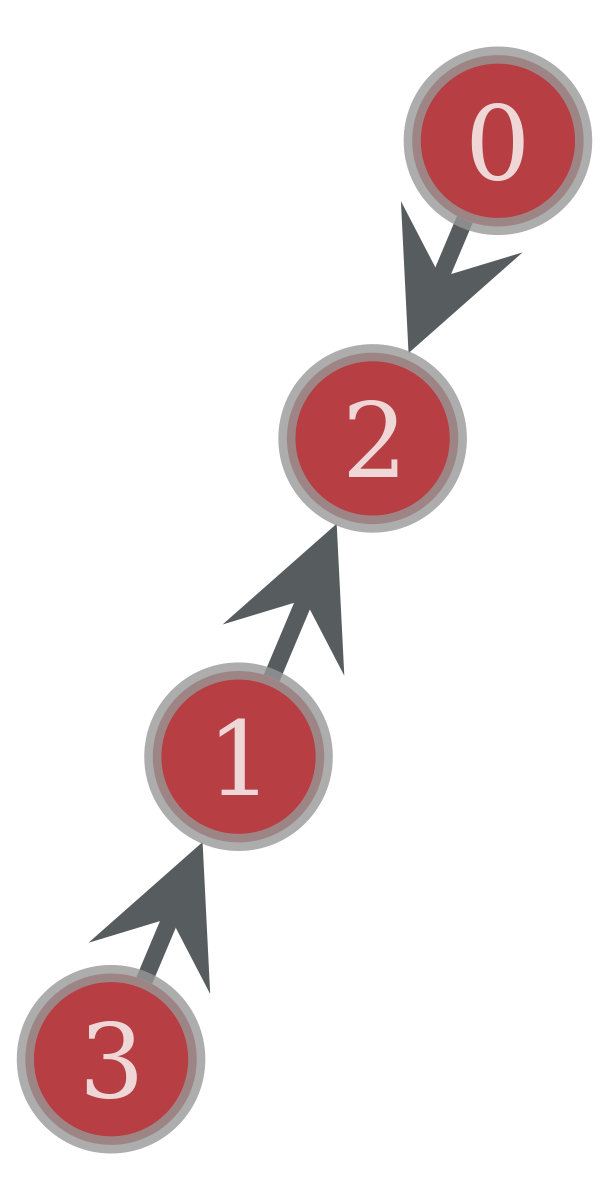

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe24ecfdf50, at 0x7fe1cbfae4d0>

In [24]:
gt.graph_draw(g, vertex_text = g.vertex_index)

エッジおよびノードに対してイテレーションする処理

In [25]:
# iterations over vertices
for v in g.vertices():
    for e in v.out_edges():
        print(e.source(), e.target())

# iterations over edges
for e in g.edges():
    print(e.source(), e.target())

0 2
1 2
3 1
0 2
1 2
3 1


エッジ数、ノード数の取得

In [26]:
g.num_vertices()   # => 4

4

In [27]:
g.num_edges()     # => 3

3

属性を追加する

ノード：VertexProperty

エッジ：EdgeProperty

重み付きグラフを構築する

In [28]:
#g = gt.Graph()
g.ep["weight"] = g.new_edge_property("double")
# `ep` (edge property)の"weight" という名前でdouble型のedge propertyを作成
g.list_properties()

weight         (edge)    (type: double)


In [29]:
g.ep.weight                      
# => <EdgePropertyMap object with value type 'double', for Graph 0x7fbf8897c100, at 0x7fbfcb2e3ee0>

<EdgePropertyMap object with value type 'double', for Graph 0x7fe24ecfdf50, at 0x7fe1cd935750>

In [30]:
g.ep.weight.a
# PropertyArray([0., 0., 0.])

PropertyArray([0., 0., 0.])

In [31]:
e1 = g.edge(g.vertex(0), g.vertex(2))# node-(0,2) の間のedgeを取得
g.ep.weight[e]
# => weight of edge e

0.0

サンプルデータを用いる（このデータにはg.ep.valueに重みが格納されている）

In [12]:
g = gt.collection.data["celegansneural"]

次数分布

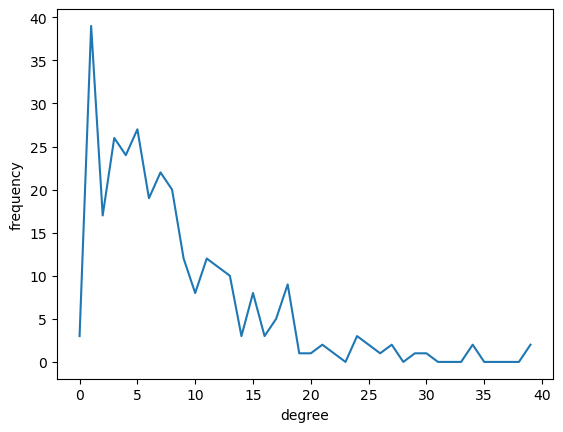

In [13]:
pk,k = gt.vertex_hist(g, "out")

plt.xlabel("degree")
plt.ylabel("frequency")
plt.plot(k[:-1], pk)               # `k`の最後の１要素は除く

average_degree

In [14]:
avg,sdv = gt.vertex_average(g, "out")          # => (7.942760942760943, 0.39915717608995005)

edge weight distribution

In [15]:
pw,w = gt.edge_hist(g, g.ep.value)

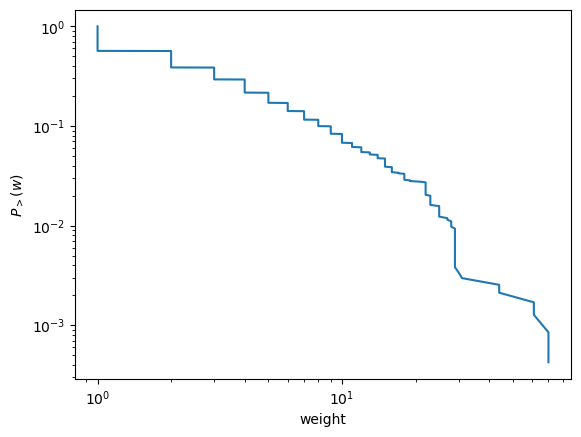

In [16]:
# complementary cumulative distribution function
weights = np.sort(g.ep.value.a)
ccdf = np.linspace(1.0, 0.0, num=g.num_edges(), endpoint=False)
plt.xlabel("weight")
plt.ylabel(r"$P_{>}(w)$")
plt.xscale("log")
plt.yscale("log")
plt.plot(weights, ccdf)

average edge weight

In [17]:
gt.edge_average(g, g.ep.value)

(3.738448495125053, 0.11244335884621029)

node strength

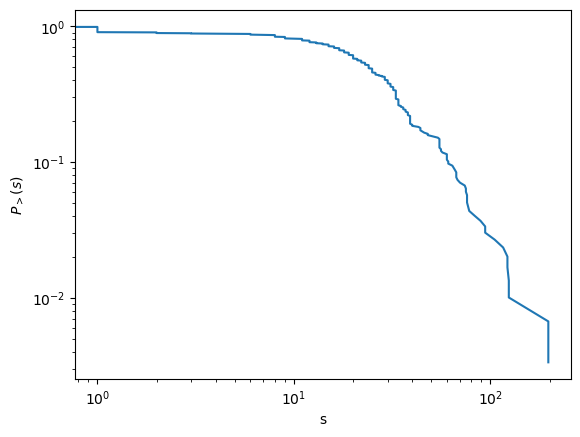

In [18]:
out_strength = g.new_vertex_property("double")
for v in g.vertices():
    weights = [g.ep.value[e] for e in v.out_edges()]
    out_strength[v] = np.sum(weights)

ps,s = gt.vertex_hist(g, out_strength)

# plot of complementary cumulative distribution function
s = np.sort(out_strength.a)
ccdf = np.linspace(1.0, 0.0, num=g.num_vertices(), endpoint=False)
plt.xlabel("s")
plt.ylabel(r"$P_{>}(s)$")
plt.xscale("log")
plt.yscale("log")
plt.plot(s, ccdf)

clustering coefficient

In [19]:
gt.global_clustering(g)              # => (0.19795997218143885, 0.027169317947021772)

(0.19795997218143885, 0.027169317947021772)

clustering spectrum c(k)

<ErrorbarContainer object of 3 artists>

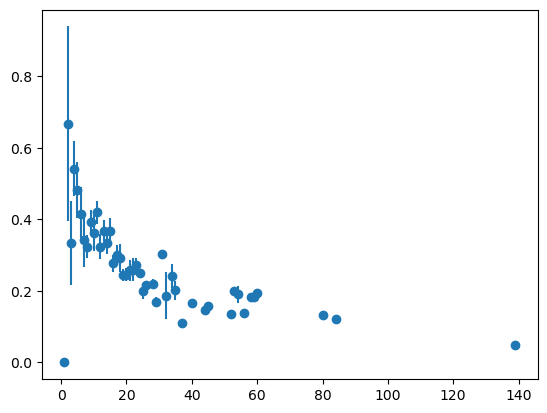

In [20]:
# correlation between k and local clusteirng
gt.local_clustering(g)                 # => double type の VertexProperty

h = gt.avg_combined_corr(g, "total", gt.local_clustering(g))
plt.errorbar( h[2][:-1], h[0], yerr=h[1], fmt="o")

degree correlation

<ErrorbarContainer object of 3 artists>

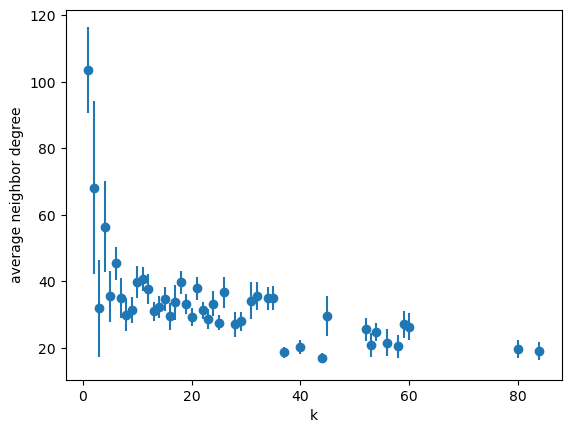

In [21]:
# average degree correlation
knn = gt.avg_neighbor_corr(g, "total", "total")
plt.xlabel("k")
plt.ylabel("average neighbor degree")
plt.errorbar( knn[2][:-1], knn[0], yerr=knn[1], fmt="o")

centrality

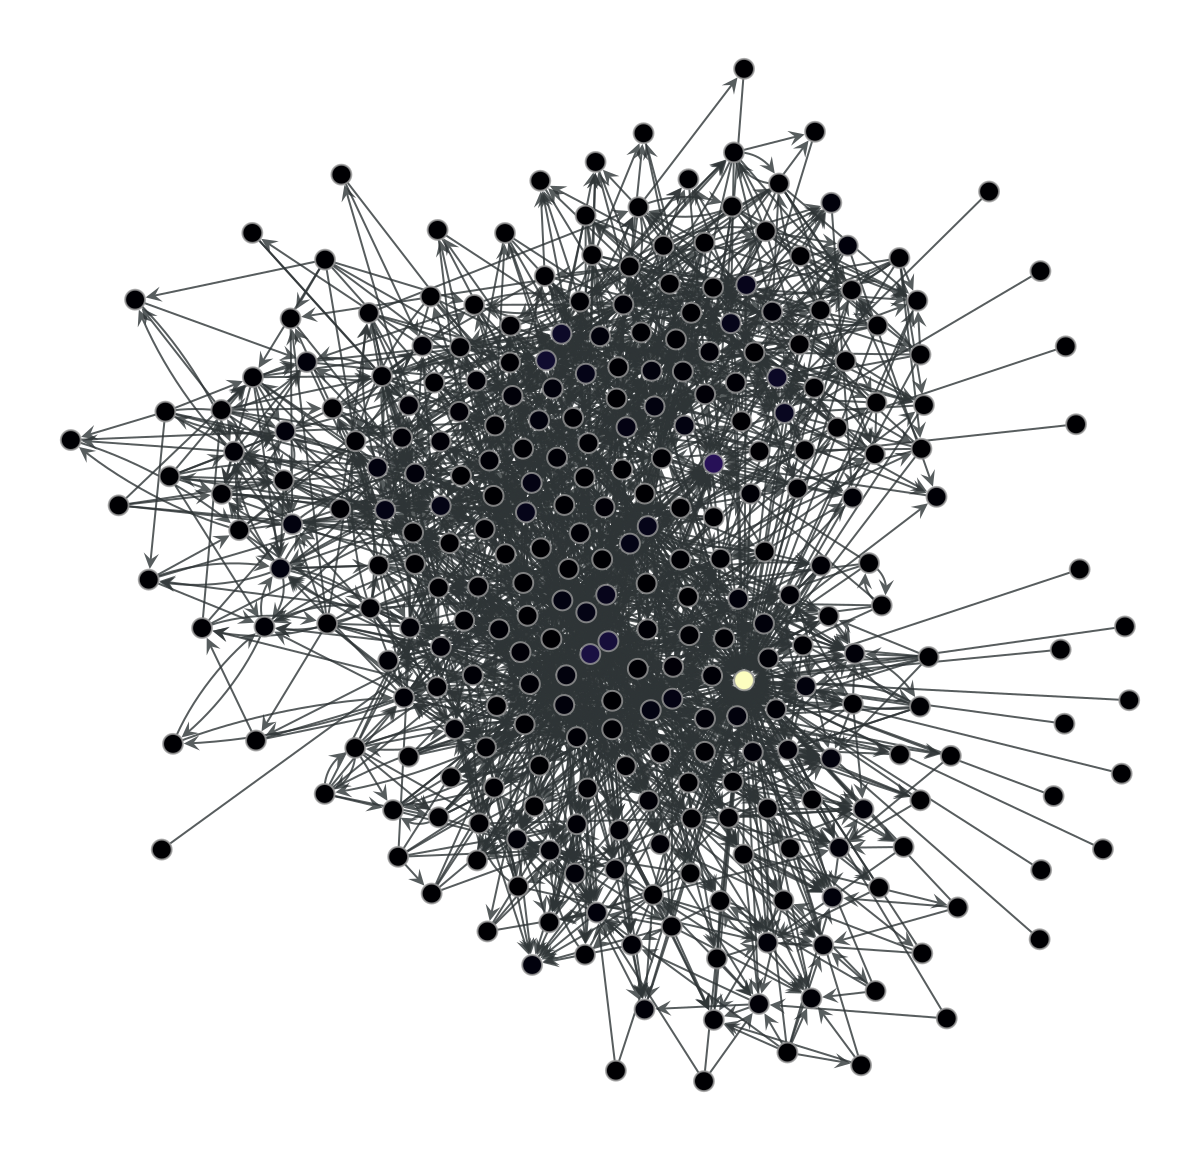

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f62f8589e50, at 0x7f62f594c590>

In [22]:
prc = gt.pagerank(g, weight = g.ep.value)
gt.graph_draw(g, vertex_fill_color = prc, pos = g.vp.pos)